## Cancer Classification with SVM
## Read Data

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [65]:
print("Type of class count: \n", df['Class'].value_counts())

Type of class count: 
 Class
2    458
4    241
Name: count, dtype: int64


array([[<Axes: title={'center': 'Clump'}>,
        <Axes: title={'center': 'UnifSize'}>],
       [<Axes: title={'center': 'UnifShape'}>,
        <Axes: title={'center': 'MargAdh'}>]], dtype=object)

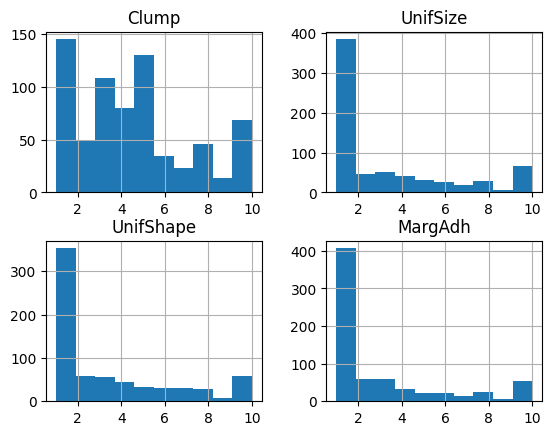

In [66]:
df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh']].hist()

### The distribution of the classes based on Clump thickness and Uniformity of cell size

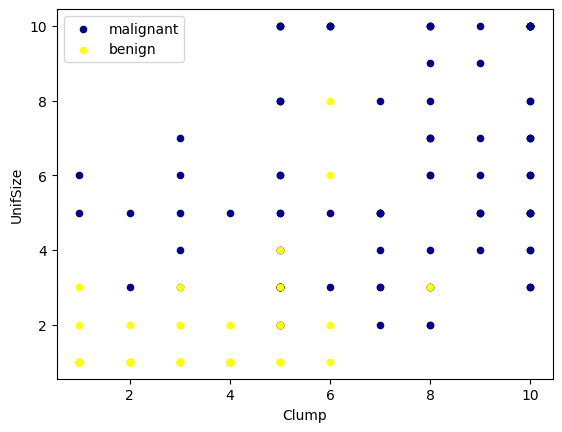

In [67]:
ax = df[df['Class'] == 4][:100].plot(kind='scatter', x='Clump', y='UnifSize',color='DarkBlue', label='malignant')
df[df['Class'] == 2][:100].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow',label='benign', ax=ax)
plt.show()

## ## Data pre-processing 

In [78]:
print(df.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


In [79]:
print(df['BareNuc'].value_counts())

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64


In [76]:
# Drop none numerical value 'BareNuc'
cdf = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
cdf['BareNuc'] = cdf['BareNuc'].astype('int')
cdf['BareNuc'].value_counts()

/var/folders/1f/nt9ksrns0t9b0pgshy_r5kl00000gn/T/ipykernel_1642/2263095207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['BareNuc'] = cdf['BareNuc'].astype('int')


BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

## Modeling SVM 

In [83]:

X = cdf[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
print(X[:5],'\n', X.shape)
y = cdf['Class'].values

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]] 
 (683, 9)


In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

In [85]:
from sklearn import svm
cls = svm.SVC(kernel='rbf')
cls.fit(x_train, y_train)

SVC()

In [87]:
yhat = cls.predict(x_test)
yhat[:5]

array([2, 4, 2, 4, 2])

## Evaluation

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


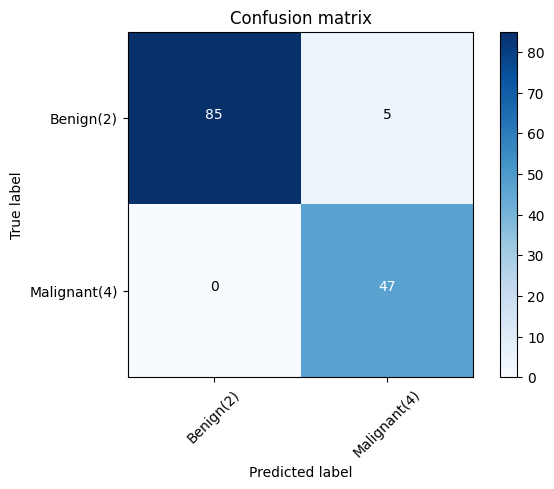

In [90]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')